# Exploratory data analysis

In [9]:
from fraudetect.dataset import load_data

In [10]:
df_data = load_data("../data/training.csv")

step: load data


D:\fraud-detection-galsen\fraudetect\dataset.py:12: UserWarning: Parsing dates in %Y-%m-%dT%H:%M:%S%z format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_data["TransactionStartTime"] = pd.to_datetime(


In [15]:
df_data.head(3)

,TRANSACTION_ID,BatchId,AccountId,SubscriptionId,CUSTOMER_ID,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TX_AMOUNT,Value,TX_DATETIME,PricingStrategy,TX_FRAUD,TX_TIME_DAYS
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,0


In [14]:
# Time Coverage
df_data['TX_DATETIME'].iloc[-1] - df_data['TX_DATETIME'].iloc[0]

Timedelta('90 days 07:42:39')

In [19]:
cols = ['AccountId', 'CUSTOMER_ID','SubscriptionId']
df_demo = df_data[cols].apply(lambda x: "+".join(x), axis=1,raw=False,result_type='reduce')
df_demo

0        AccountId_3957+CustomerId_4406+SubscriptionId_887
1        AccountId_4841+CustomerId_4406+SubscriptionId_...
2        AccountId_4229+CustomerId_4683+SubscriptionId_222
3         AccountId_648+CustomerId_988+SubscriptionId_2185
4        AccountId_4841+CustomerId_988+SubscriptionId_3829
                               ...                        
95657    AccountId_4841+CustomerId_3078+SubscriptionId_...
95658    AccountId_3439+CustomerId_3874+SubscriptionId_...
95659    AccountId_4841+CustomerId_3874+SubscriptionId_...
95660    AccountId_1346+CustomerId_1709+SubscriptionId_652
95661    AccountId_4841+CustomerId_1709+SubscriptionId_...
Length: 95662, dtype: object

In [20]:
df_demo.nunique()

8222

## Understand features

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  object             
 1   BatchId               95662 non-null  object             
 2   AccountId             95662 non-null  object             
 3   SubscriptionId        95662 non-null  object             
 4   CustomerId            95662 non-null  object             
 5   CurrencyCode          95662 non-null  object             
 6   CountryCode           95662 non-null  int64              
 7   ProviderId            95662 non-null  object             
 8   ProductId             95662 non-null  object             
 9   ProductCategory       95662 non-null  object             
 10  ChannelId             95662 non-null  object             
 11  Amount                95662 non-null  float64            
 12  Valu

In [6]:
df_data.nunique()/len(df_data)

TransactionId           1.000000
BatchId                 0.991083
AccountId               0.037977
SubscriptionId          0.037915
CustomerId              0.039117
CurrencyCode            0.000010
CountryCode             0.000010
ProviderId              0.000063
ProductId               0.000240
ProductCategory         0.000094
ChannelId               0.000042
Amount                  0.017520
Value                   0.015858
TransactionStartTime    0.988438
PricingStrategy         0.000042
FraudResult             0.000021
dtype: float64

In [6]:
df_data.nunique()

TransactionId           95662
BatchId                 94809
AccountId                3633
SubscriptionId           3627
CustomerId               3742
CurrencyCode                1
CountryCode                 1
ProviderId                  6
ProductId                  23
ProductCategory             9
ChannelId                   4
Amount                   1676
Value                    1517
TransactionStartTime    94556
PricingStrategy             4
FraudResult                 2
dtype: int64

In [7]:
df_data.dtypes

TransactionId                        object
BatchId                              object
AccountId                            object
SubscriptionId                       object
CustomerId                           object
CurrencyCode                         object
CountryCode                           int64
ProviderId                           object
ProductId                            object
ProductCategory                      object
ChannelId                            object
Amount                              float64
Value                                 int64
TransactionStartTime    datetime64[ns, UTC]
PricingStrategy                       int64
FraudResult                           int64
dtype: object

In [8]:
columns_to_drop = ['BatchId','CurrencyCode','CountryCode']

In [11]:
stats_normal = df_data.loc[df_data['FraudResult']==0].describe()
stats_normal

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95469.0,9.546900e+04,9.546900e+04,95469.000000,95469.0
mean,256.0,3.627723e+03,6.763227e+03,2.257089,0.0
std,0.0,4.035711e+04,3.999484e+04,0.731971,0.0
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.0
25%,256.0,-5.000000e+01,2.500000e+02,2.000000,0.0
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.0
75%,256.0,2.500000e+03,5.000000e+03,2.000000,0.0
max,256.0,2.400000e+06,2.400000e+06,4.000000,0.0


In [12]:
stats_fraud = df_data.loc[df_data['FraudResult']==1].describe()
stats_fraud

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,193.0,1.930000e+02,1.930000e+02,193.000000,193.0
mean,256.0,1.535272e+06,1.561820e+06,1.704663,1.0
std,0.0,2.100525e+06,2.081227e+06,0.963300,0.0
min,256.0,-9.000000e+05,5.000000e+02,0.000000,1.0
25%,256.0,5.000000e+05,5.000000e+05,2.000000,1.0
50%,256.0,6.000000e+05,6.500000e+05,2.000000,1.0
75%,256.0,2.000000e+06,2.000000e+06,2.000000,1.0
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.0


In [ ]:
# we see that the Amount is very large in Frauds
stats_fraud/stats_normal

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,0.002022,0.002022,0.002022,0.002022,0.002022
mean,1.000000,423.205557,230.928166,0.755249,inf
std,NaN,52.048457,52.037401,1.316035,NaN
min,1.000000,0.900000,250.000000,NaN,inf
25%,1.000000,-10000.000000,2000.000000,1.000000,inf
50%,1.000000,600.000000,650.000000,1.000000,inf
75%,1.000000,800.000000,400.000000,1.000000,inf
max,1.000000,4.116667,4.116667,1.000000,inf


### Understand CustomerId, accountId, SubscriptionId

In [9]:
identifiers = ['SubscriptionId','AccountId','CustomerId']

In [10]:
df_data[identifiers].nunique()

SubscriptionId    3627
AccountId         3633
CustomerId        3742
dtype: int64

In [11]:
df_data.groupby(identifiers[:-1]).nunique()[identifiers[-1:]]

,,CustomerId
SubscriptionId,AccountId,
SubscriptionId_10,AccountId_2708,1
SubscriptionId_1000,AccountId_3421,1
SubscriptionId_1001,AccountId_1297,1
SubscriptionId_1002,AccountId_1344,1
SubscriptionId_1004,AccountId_4474,1
...,...,...
SubscriptionId_993,AccountId_4674,1
SubscriptionId_995,AccountId_3226,1
SubscriptionId_997,AccountId_2575,1


In [12]:
# subscriptionId and AccountID are not sufficient to identify a unique person doing a transaction

(df_data.groupby(identifiers[:-1]).nunique()[identifiers[-1:]]>1).sum()

CustomerId    10
dtype: int64

In [13]:
df_data.groupby(identifiers[1:]).nunique()[identifiers[:1]]

SubscriptionId
AccountId     CustomerId                     
AccountId_1   CustomerId_46                 1
AccountId_10  CustomerId_1074               1
              CustomerId_1093               1
              CustomerId_1096               1
              CustomerId_1156               1
...                                       ...
AccountId_99  CustomerId_420                1
AccountId_990 CustomerId_1339               1
AccountId_992 CustomerId_1341               1
AccountId_994 CustomerId_1343               1
AccountId_998 CustomerId_1349               1

[8222 rows x 1 columns]

In [14]:
# We can drop the ``subscriptionId`` column if we keep both ``AccountId`` and ``CustomerId``

(df_data.groupby(identifiers[1:]).nunique()[identifiers[:1]]>1).sum()

SubscriptionId    0
dtype: int64

In [15]:
df_data.groupby(['SubscriptionId','CustomerId']).nunique()['AccountId']

SubscriptionId       CustomerId     
SubscriptionId_10    CustomerId_3128    1
SubscriptionId_1000  CustomerId_3855    1
SubscriptionId_1001  CustomerId_1659    1
SubscriptionId_1002  CustomerId_1707    1
SubscriptionId_1004  CustomerId_4934    1
                                       ..
SubscriptionId_993   CustomerId_5142    1
SubscriptionId_995   CustomerId_3654    1
SubscriptionId_997   CustomerId_2992    1
SubscriptionId_998   CustomerId_4636    1
SubscriptionId_999   CustomerId_1210    1
Name: AccountId, Length: 6545, dtype: int64

In [16]:
# subscriptionId and CustomerId are not sufficient to identify a unique person doing a transaction
(df_data.groupby(['SubscriptionId','CustomerId']).nunique()[['AccountId']] > 1).sum()

AccountId    1677
dtype: int64

In [17]:
# discard 'SubscriptionId' column
columns_to_drop.append('SubscriptionId')

# Train-test split

The train-test split should be done in a way that we have different customers in the training and test set


### functions

In [57]:
from fraudetect.dataset import train_test_split
from fraudetect.helpers import get_train_test_set
import matplotlib.pyplot as plt
import numpy as np

### debugging

In [ ]:
# renaming columns
rename_cols = {
    'FraudResult': 'TX_FRAUD',
    'Amount': 'TX_AMOUNT',
    'CustomerId': 'CUSTOMER_ID',
    'TransactionStartTime': 'TX_DATETIME',
    'TransactionId': 'TRANSACTION_ID',
}

df_data.rename(columns=rename_cols, inplace=True)
df_data.columns

Index(['TRANSACTION_ID', 'BatchId', 'AccountId', 'SubscriptionId',
       'CUSTOMER_ID', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'TX_AMOUNT', 'Value', 'TX_DATETIME',
       'PricingStrategy', 'TX_FRAUD', 'TX_TIME_DAYS'],
      dtype='object')

In [7]:
# create TX_TIME_DAYS column
df_data['TX_TIME_DAYS'] = (df_data['TX_DATETIME'] - df_data['TX_DATETIME'].min()).dt.days

# create TX_TIME_SECONDS column
# df_data['TX_TIME_SECONDS'] = (df_data['TX_DATETIME'] - df_data['TX_DATETIME'].min()).dt.seconds

In [8]:
# df_data.set_index('TX_DATETIME',inplace=True)
df_data.sort_values('TX_DATETIME',inplace=True,ascending=True)

In [9]:
df_data_copy = df_data.copy()
df_data_copy['Fraud_cumsum'] = df_data_copy['TX_FRAUD'].cumsum()

<Axes: title={'center': 'Fraud over time'}, xlabel='TX_DATETIME'>

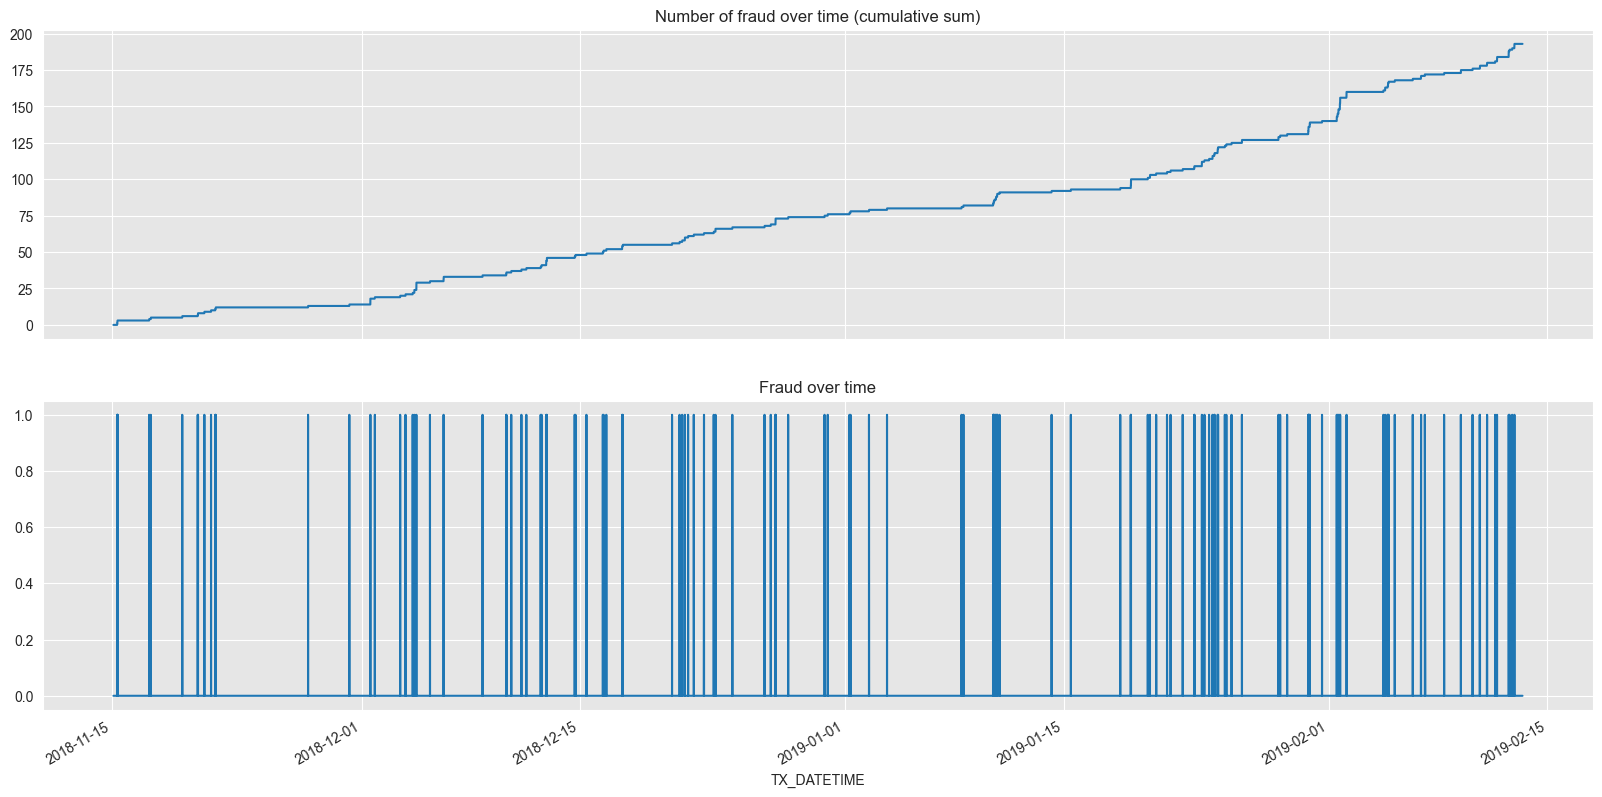

In [10]:
fig,axes = plt.subplots(2,1,figsize=(20,10),sharex=True)
df_data_copy.plot(ax=axes[0], x='TX_DATETIME', y='Fraud_cumsum', title='Number of fraud over time (cumulative sum)', legend=False)

df_data_copy.plot(ax=axes[1], x='TX_DATETIME', y='TX_FRAUD', title='Fraud over time', legend=False)

In [11]:
# Set the starting day for the training period, and the deltas
start_date_training = df_data['TX_DATETIME'].iloc[0]
delta_train=62
delta_delay=7
delta_test=21

train_df, test_df = get_train_test_set(df_data,
                                    start_date_training=start_date_training,
                                    delta_train=delta_train,
                                    delta_test=delta_test,
                                    delta_delay=delta_delay,
                                    sampling_ratio=1.0
                                    )

In [12]:
# number of samples
train_df.shape[0], test_df.shape[0]

(61407, 25932)

In [13]:
# number of positive samples
train_df[train_df.TX_FRAUD==1].shape[0], test_df[test_df.TX_FRAUD==1].shape[0]

(93, 82)

In [14]:
# ratio of positive samples in Train set
round(train_df[train_df.TX_FRAUD==1].shape[0]/train_df.shape[0], 6)

0.001514

In [15]:
# ratio of positive samples in Test set
round(test_df[test_df.TX_FRAUD==1].shape[0]/test_df.shape[0], 6)

0.003162

In [16]:
# customers overlap between train and test set
customers_intersec = np.intersect1d(train_df['CUSTOMER_ID'].unique(), test_df['CUSTOMER_ID'].unique())
customers_intersec.shape

(893,)

In [17]:
# unique customers to train set
customers_unique_to_train = [a for a in train_df['CUSTOMER_ID'].unique() if a not in customers_intersec]
len(customers_unique_to_train), len(customers_unique_to_train)/len(train_df['CUSTOMER_ID'].unique())

(1870, 0.6768005790807093)

In [18]:
# unique customers to test set
customers_unique_to_test = [a for a in test_df['CUSTOMER_ID'].unique() if a not in customers_intersec]
len(customers_unique_to_test), len(customers_unique_to_test)/len(test_df['CUSTOMER_ID'].unique())

(865, 0.4920364050056883)

# Feature engineering

### functions

In [58]:
from fraudetect.dataset import load_data
from fraudetect.features import transform_data

### debugging

In [22]:
df_data.head(3)

,TRANSACTION_ID,BatchId,AccountId,SubscriptionId,CUSTOMER_ID,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TX_AMOUNT,Value,TX_DATETIME,PricingStrategy,TX_FRAUD,TX_TIME_DAYS
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,0


In [120]:
df_data.nunique()

TRANSACTION_ID     95662
BatchId            94809
AccountId           3633
SubscriptionId      3627
CUSTOMER_ID         3742
CurrencyCode           1
CountryCode            1
ProviderId             6
ProductId             23
ProductCategory        9
ChannelId              4
TX_AMOUNT           1676
Value               1517
TX_DATETIME        94556
PricingStrategy        4
TX_FRAUD               2
TX_TIME_DAYS          91
dtype: int64

In [ ]:
COLUMNS_TO_DROP = ['CurrencyCode','CountryCode','SubscriptionId','BatchId','CUSTOMER_ID','AccountId','TRANSACTION_ID','TX_DATETIME','TX_TIME_DAYS']
COLUMNS_TO_ONE_HOT_ENCODE = ['PricingStrategy','ChannelId', 'ProductCategory', 'ProviderId', 'ProductId']
COLUMNS_TO_SCALE = ['TX_DURING_WEEKEND','TX_DURING_NIGHT','TX_AMOUNT','Value'] # or None to select all numeric columns

In [25]:
df_data.nunique().loc[COLUMNS_TO_ONE_HOT_ENCODE].sum()

np.int64(46)

In [26]:
train_df.columns

Index(['TRANSACTION_ID', 'BatchId', 'AccountId', 'SubscriptionId',
       'CUSTOMER_ID', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'TX_AMOUNT', 'Value', 'TX_DATETIME',
       'PricingStrategy', 'TX_FRAUD', 'TX_TIME_DAYS'],
      dtype='object')

In [ ]:
(X_train, y_train),(onehot_encoder, scaler) = transform_data(train_df=train_df, 
                                                            val_df=None,
                                                            columns_to_drop=COLUMNS_TO_DROP,
                                                            columns_to_onehot_encode=COLUMNS_TO_ONE_HOT_ENCODE,
                                                            columns_to_scale=COLUMNS_TO_SCALE,
                                                            windows_size_in_days=[1,7,30])

In [125]:
X_train.shape, X_train.dtype

((61407, 62), dtype('float64'))

In [58]:
onehot_encoder.categories_

[array(['0', '1', '2', '4'], dtype=object),
 array(['ChannelId_1', 'ChannelId_2', 'ChannelId_3', 'ChannelId_5'],
       dtype=object),
 array(['airtime', 'data_bundles', 'financial_services', 'movies', 'other',
        'ticket', 'transport', 'tv', 'utility_bill'], dtype=object),
 array(['ProviderId_1', 'ProviderId_2', 'ProviderId_3', 'ProviderId_4',
        'ProviderId_5', 'ProviderId_6'], dtype=object),
 array(['ProductId_1', 'ProductId_10', 'ProductId_11', 'ProductId_12',
        'ProductId_13', 'ProductId_14', 'ProductId_15', 'ProductId_16',
        'ProductId_19', 'ProductId_2', 'ProductId_20', 'ProductId_21',
        'ProductId_22', 'ProductId_23', 'ProductId_24', 'ProductId_27',
        'ProductId_3', 'ProductId_4', 'ProductId_5', 'ProductId_6',
        'ProductId_7', 'ProductId_8', 'ProductId_9'], dtype=object)]

In [ ]:
kwargs_tranform_data = dict(columns_to_drop=COLUMNS_TO_DROP,
                            columns_to_onehot_encode=COLUMNS_TO_ONE_HOT_ENCODE,
                            columns_to_scale=COLUMNS_TO_SCALE,
                            windows_size_in_days=[1,7,30])

data = data_loader(kwargs_tranform_data=kwargs_tranform_data,
                    data_path="../data/training.csv", 
                    split_method='hold-out',
                    delta_train=40, 
                    delta_delay=7, 
                    delta_test=20,
                    n_folds=None,
                    random_state=41,
                    sampling_ratio=1.0
                )

In [155]:
len(data)
# X_train, y_train, X_val, y_val = data

4

In [159]:
data = data_loader(kwargs_tranform_data=kwargs_tranform_data,
                    data_path="../data/training.csv", 
                    split_method='prequential',
                    delta_train=40, 
                    delta_delay=7, 
                    delta_test=20,
                    n_folds=5,
                    random_state=41,
                    sampling_ratio=1.0
                )
len(data)

2

In [ ]:
data[0][0].shape, data[0][1].shape, len(data[1])

((95662, 62), (95662,))

# Training classifiers

In [1]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, 
                              GradientBoostingClassifier, 
                              AdaBoostClassifier,
                              BaggingClassifier,
                              VotingClassifier,
                              StackingClassifier,
                              HistGradientBoostingClassifier, 
                              IsolationForest
                            )
   
import time

### Evaluation

In [48]:
from fraudetect.modeling.utils import evaluate, get_scorer_names

### Hyperparameters search config

In [4]:
import numpy as np

In [47]:
config = dict()

config['logisticReg'] = dict(penalty=['l2'],
                             C=np.logspace(-4, 4, 10).tolist(),
                             class_weight=['balanced', None],
                             solver=['liblinear'],
                             max_iter=[int(1e4)],
                             random_state=[None],
                             tol=[1e-4],
                             model=LogisticRegression,
                            )

config['svc'] = dict(C=np.logspace(-4, 4, 10).tolist(),
                     kernel=['poly', 'rbf','linear'],
                     degree=[2,3,5,7],
                     gamma=['auto','scale'],
                     tol=[1e-4],
                     class_weight=['balanced', None],
                     max_iter=[int(1e4)],
                     random_state=[None],
                     probability=[False],
                     model=SVC,
                    )

config['linearSVC'] = dict(penalty=['l2'],
                        loss=['square_hinge','hinge'],
                        C=np.logspace(-4, 4, 10).tolist(),
                        class_weight=['balanced', None],
                        max_iter=[int(1e4)],
                        random_state=[None],
                        model=LinearSVC,
                        tol=[1e-4],
                    )

config['sgdClassifier'] = dict(loss=['hinge','squared_hinge','modified_huber','log_loss',],
                               penalty=['l2','l1','elasticnet',None],
                                alpha=np.logspace(-4, 4, 10).tolist(),
                                l1_ratio=[0.15, 0.5, 0.85],
                                class_weight=['balanced', None],
                                max_iter=[int(1e3)],
                                learning_rate=['optimal','invscaling','adaptive'],
                                random_state=[None],
                                shuffle=[True,False],
                                tol=[1e-4],
                                eta0=[1e-5],
                                early_stopping=[False],
                                n_iter_no_change=[10],
                                model=SGDClassifier,
                            )

config['decisionTree'] = dict(criterion=['gini','entropy','log_loss'],
                               splitter=['best'],
                               max_depth=[None,5,7,9,10,15,20],
                               min_samples_split=[2,3,4],
                               min_samples_leaf=[1,2],
                               class_weight=['balanced', None],
                               max_features=['sqrt','log2',None],
                               random_state=[None],
                               model=DecisionTreeClassifier,
                            )

config['randomForest'] = dict(n_estimators=[10,20,50,100,200,500],
                               criterion=['gini','entropy','log_loss'],
                               max_depth=[None,5,7,9,10,15,20],
                               min_samples_split=[2,3,4],
                               min_samples_leaf=[1,2],
                               class_weight=['balanced', 'balanced_subsample', None],
                               max_features=['sqrt','log2',None],
                               random_state=[None],
                               n_jobs=[8],
                               model=RandomForestClassifier,
                            )

config['gradientBoosting'] = dict(loss=['log_loss','exponential'],
                                  n_estimators=[10,50,100,200,500],
                                  learning_rate=np.logspace(-4, -1, 10).tolist(),
                                  subsample=[0.5, 0.75, 1.0],
                                  criterion='friedman_mse',
                                  max_depth=[None,3,5,7,9,10,15,20],
                                  min_samples_split=[2,3,4],
                                  min_samples_leaf=[1,2],
                                  max_features=['sqrt','log2',None],
                                  random_state=[None],
                                  tol=1e-4,
                                  model=GradientBoostingClassifier,
                                )

# -> handles missig values
config['histGradientBoosting'] = dict(loss=['log_loss'],
                                       max_iter=[100,500,1000,10000],
                                       learning_rate=np.logspace(-4, -1, 10).tolist(),
                                       max_depth=[None,3,5,7,9,10,15,20],
                                       l2_regularization=np.logspace(-4, 4, 10).tolist(),
                                       categorical_features=[None],
                                       random_state=[None],
                                       max_bins=[2**5-1, 2**6-1, 2**7-1, 2**8-1],
                                       class_weight=['balanced', None],
                                       n_iter_no_change=[10],
                                       tol=[1e-7],
                                       model=HistGradientBoostingClassifier,
                                    )

# #TODO: For the models below, try only after optimizing the previous model
# config['baggingClassifier'] = dict(estimator=[RandomForestClassifier(), 
#                                               HistGradientBoostingClassifier(), 
#                                               DecisionTreeClassifier(), 
#                                               LinearSVC(),
#                                               SGDClassifier()],
#                                    n_estimators=[3, 5, 7, 15],
#                                    max_samples=[0.5, 0.75, 1.0],
#                                    max_features=[0.5, 0.75, 1.0],
#                                    bootstrap=[True, False],
#                                    bootstrap_features=[True, False],
#                                    random_state=[41],
#                                    model=BaggingClassifier,
#                                 )

# config['votingClassifier'] = dict(estimators=[...],
#                                    voting=['soft'],
#                                    random_state=[41],
#                                    model=VotingClassifier,
#                                 )

# config['adaBoostClassifier'] = dict(estimator=[RandomForestClassifier(), 
#                                               HistGradientBoostingClassifier(), 
#                                               DecisionTreeClassifier(), 
#                                               LinearSVC(),
#                                               SGDClassifier()],
#                          n_estimators=[10,50,75,100],
#                          learning_rate=np.logspace(-4, -1, 10).tolist(),
#                          algorithm=['SAMME'],
#                          random_state=[41],
#                          model=AdaBoostClassifier,
#                         )

# config['stackingClassifier'] = dict(estimators=[...],
#                                  final_estimator=[LogisticRegression(),SVC(),SGDClassifier()],
#                                  cv=[None],
#                                  stack_method=['auto'],
#                                  passthrough=[False],
#                                  verbose=[0],
#                                  model=StackingClassifier,
#                               )


### Model selection

In [9]:
# TODO: GroupKFold -> Assess if there is a leakage from training to test set ?
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupKFold.html

### functions

In [60]:
from fraudetect.modeling.utils import hyperparameter_tuning, results_from_search
from fraudetect.dataset import data_loader
from sklearn.model_selection import TimeSeriesSplit

### debugging

In [40]:
COLUMNS_TO_DROP = ['CurrencyCode','CountryCode','SubscriptionId','BatchId','CUSTOMER_ID','AccountId','TRANSACTION_ID','TX_DATETIME','TX_TIME_DAYS']
COLUMNS_TO_ONE_HOT_ENCODE = ['PricingStrategy','ChannelId', 'ProductCategory', 'ProviderId', 'ProductId']
COLUMNS_TO_SCALE = ['TX_DURING_WEEKEND','TX_DURING_NIGHT','TX_AMOUNT','Value'] # or None to select all numeric columns

In [41]:
# prepare data
kwargs_tranform_data = dict(columns_to_drop=COLUMNS_TO_DROP,
                            columns_to_onehot_encode=COLUMNS_TO_ONE_HOT_ENCODE,
                            columns_to_scale=COLUMNS_TO_SCALE,
                            windows_size_in_days=[1,7,30])

(X_train, y_train), prequential_split_indices  = data_loader(kwargs_tranform_data=kwargs_tranform_data,
                                                            data_path="../data/training.csv", 
                                                            split_method='prequential',
                                                            delta_train=40, 
                                                            delta_delay=7, 
                                                            delta_test=20,
                                                            n_folds=5,
                                                            random_state=41,
                                                            sampling_ratio=1.0
                                                        )

In [42]:
X_train.shape, y_train.shape

((95662, 62), (95662,))

In [43]:
# Average number of transaction per day
df_data = load_data("../data/training.csv")
round(df_data.groupby('TX_TIME_DAYS').count().mean()['TRANSACTION_ID'])

1051

In [ ]:
# Hyperparameter optimization
cv= TimeSeriesSplit(n_splits=5, gap=1051*5) # 5 days, 1051 = average number of transactions per day

best_results = dict()
for model_name in config.keys():
    try:
        print(f"Hyperparameter tuning for model: {model_name}")
        search_engine = hyperparameter_tuning(cv=cv, 
                                            config=config,
                                            X_train=X_train,
                                            y_train=y_train,
                                            model_name=model_name, 
                                            scoring='f1',
                                            method='random', # other, gridsearch
                                            verbose=0,
                                            n_iter=100,
                                            n_jobs=-1,
                                            )
    except Exception as e:
        print(e)
        continue
    best_results[model_name] = [search_engine.best_params_, search_engine.best_score_, search_engine]

Hyperparameter tuning for model: logisticReg
Hyperparameter tuning for model: svc
Hyperparameter tuning for model: linearSVC
Hyperparameter tuning for model: sgdClassifier
Hyperparameter tuning for model: decisionTree
Hyperparameter tuning for model: randomForest
Hyperparameter tuning for model: gradientBoosting
Parameter grid for parameter 'tol' is not iterable or a distribution (value=0.0001)
Hyperparameter tuning for model: histGradientBoosting
Parameter grid for parameter 'loss' needs to be a list or a numpy array, but got 'log_loss' (of type str) instead. Single values need to be wrapped in a list with one element.


In [ ]:
# model_name = 'randomForest'
# search_engine = hyperparameter_tuning(cv=cv, 
#                                 X_train=X_train,
#                                 y_train=y_train,
#                                 model_name=model_name, 
#                                 scoring='f1',
#                                 method='random', # halving, gridsearch, random
#                                 verbose=0,
#                                 n_iter=50,
#                                 n_jobs=-1,
#                                 )
# search_engine.best_params_, search_engine.best_score_


In [72]:
best_results['logisticReg'][-1].best_estimator_

LogisticRegression(C=2.782559402207126, class_weight='balanced', max_iter=10000,
                   solver='liblinear')

<Axes: title={'center': 'F1 scores distribution cross-validation'}>

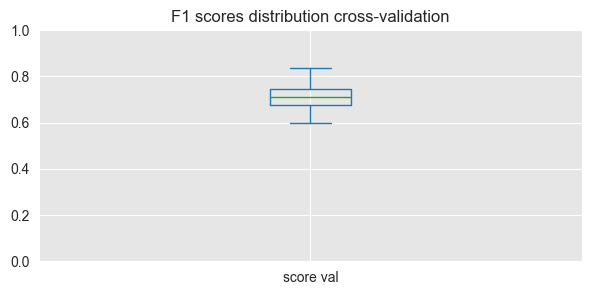

In [ ]:
performances_df = results_from_search(search_engine, performance_metrics_list=['score'])
performances_df.plot(figsize=(7,3),kind='box',y='score val',ylim=[0,1],title="F1 scores distribution / Cross-validation")

In [276]:
# model, model_cfg = get_model('logisticReg', config)
# model_cfg = sample_model_cfg(model_cfg)
# model = instantiate_model(model, **model_cfg)
# model

In [272]:
# model_trained, training_execution_time = fit_model(model, X_train, y_train,return_execution_time=True)
# evaluate(model_trained, X_train, y_train)

In [46]:
len(best_results)

6